In [3]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc("xtick", labelsize=16)
mpl.rc('ytick', labelsize=16)
mpl.rc('axes', labelsize=16)

Data preparation

In [7]:
df = pd.read_csv("pendigits.csv", header=None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10992 non-null  int64
 1   1       10992 non-null  int64
 2   2       10992 non-null  int64
 3   3       10992 non-null  int64
 4   4       10992 non-null  int64
 5   5       10992 non-null  int64
 6   6       10992 non-null  int64
 7   7       10992 non-null  int64
 8   8       10992 non-null  int64
 9   9       10992 non-null  int64
 10  10      10992 non-null  int64
 11  11      10992 non-null  int64
 12  12      10992 non-null  int64
 13  13      10992 non-null  int64
 14  14      10992 non-null  int64
 15  15      10992 non-null  int64
 16  16      10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [9]:
df = df.iloc[:,:-1]
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0


# KMeans

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

In [77]:
inertia_score = []
s_score = []
time_arr = []
for k in range(2,50):
    t1 = time.time()
    kmeans = KMeans(n_clusters=k).fit(df.values)
    time_arr.append(time.time()-t1)
    inertia_score.append(kmeans.inertia_)
    s_score.append(silhouette_score(df.values, kmeans.labels_)) 

In [37]:
# plotting function

def plotting(x, y, xlabel=None, ylabel=None, color=None, label=None):
    
    plt.figure(figsize=(5,5))
    plt.plot(x, y, marker="o", color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tick_params(length=5)
    ax = plt.gca()
    plt.savefig('{} vs. {}.png'.format(ylabel, xlabel), bbox_inches = 'tight', dpi=300)
    plt.tight_layout()
    
    return ax

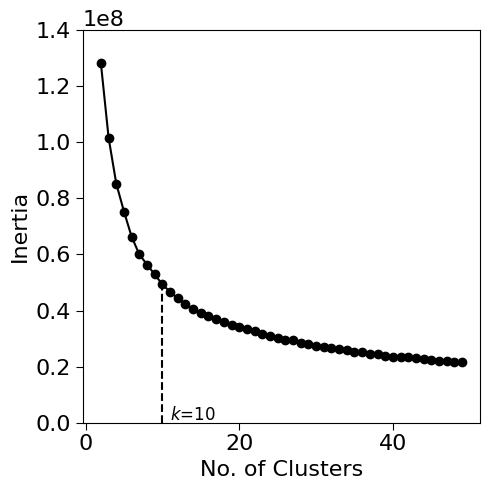

In [56]:
ax = plotting(range(2,50),inertia_score, xlabel='No. of Clusters', ylabel='Inertia', color='black')

ax.plot([10,10], [0.2, inertia_score[8]], color='black', linestyle='--')
ax.text(11, 0.01e8, '$k$=10', fontsize=12)
ax.set_ylim(0,1.4e8)
plt.savefig('Inertia vs. No. of Clusters.png', bbox_inches = 'tight', dpi=300)

<AxesSubplot: xlabel='No. of Clusters', ylabel='Silhouette Score'>

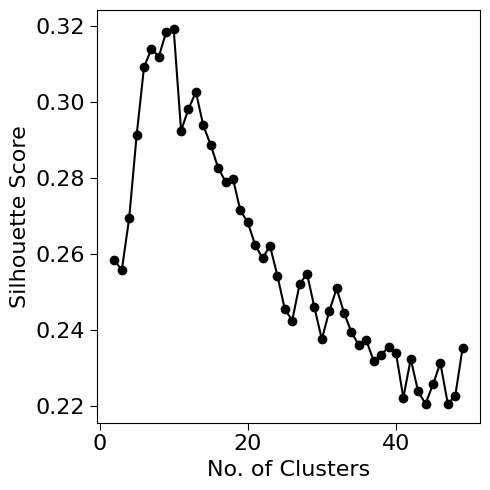

In [42]:
plotting(range(2,50),s_score, xlabel='No. of Clusters', ylabel='Silhouette Score', color='black')

In [45]:
np.argmax(s_score)

8

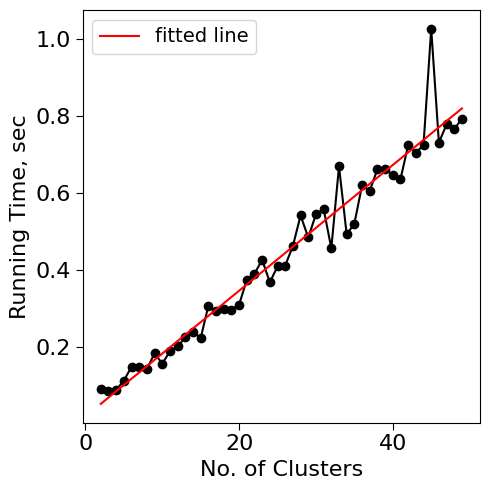

In [87]:
from scipy.stats import linregress
x = range(2,50)
res = linregress(x,time_arr)
ax = plotting(range(2,50),time_arr, xlabel='No. of Clusters', ylabel='Running Time, sec', color='black', label='raw data')
ax.plot(range(2,50), res.intercept+res.slope*x, color='red', label='fitted line')
plt.legend(fontsize=14)
plt.savefig('Time vs. No. of Clusters_kmeans.png', bbox_inches = 'tight', dpi=300)

# GMM

In [64]:
from sklearn.mixture import GaussianMixture

In [67]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0


In [81]:
bic = []
aic = []
time_arr_gmm = []
for k in range(2,50):
    t1 = time.time()
    gm = GaussianMixture(n_components=k, n_init=10).fit(df.values)
    time_arr_gmm.append(time.time()-t1)

    bic.append(gm.bic(df.values))
    aic.append(gm.aic(df.values))

<AxesSubplot: xlabel='No. of Clusters', ylabel='Information Criterion, BIC'>

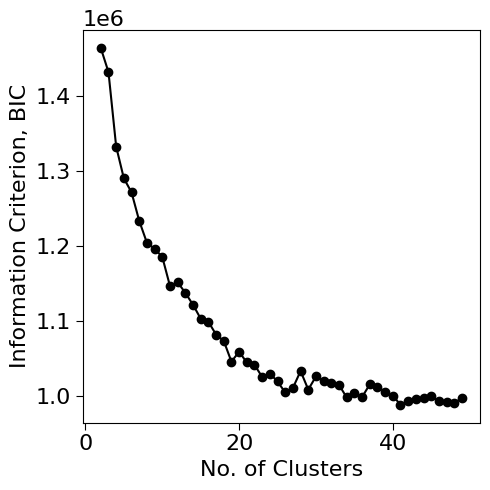

In [73]:
plotting(range(2,50),bic, xlabel='No. of Clusters', ylabel='Information Criterion, BIC', color='black')

<AxesSubplot: xlabel='No. of Clusters', ylabel='Information Criterion, AIC'>

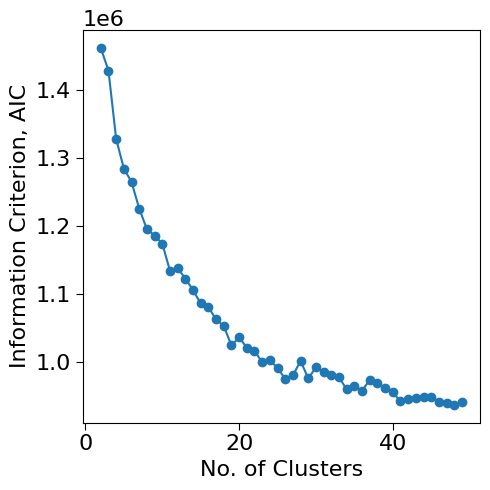

In [72]:
plotting(range(2,50),aic, xlabel='No. of Clusters', ylabel='Information Criterion, AIC')

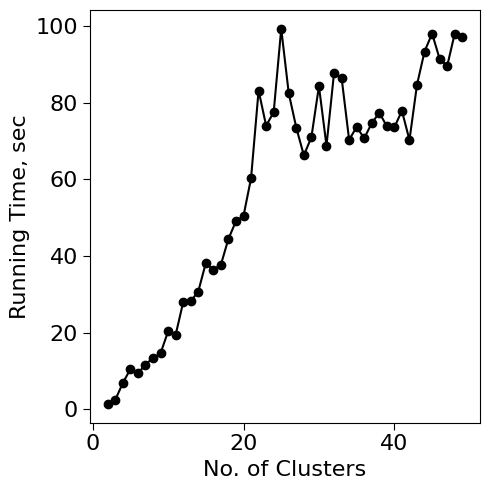

In [86]:
ax = plotting(range(2,50),time_arr_gmm, xlabel='No. of Clusters', ylabel='Running Time, sec', color='black')

In [83]:
s_score = []

time_arr_gm_sil = []
for k in range(2,50):
    t1 = time.time()
    gm = GaussianMixture(n_components=k, n_init=1).fit(df.values)
    time_arr_gm_sil.append(time.time()-t1)
    s_score.append(silhouette_score(df.values, gm.predict(df.values))) 

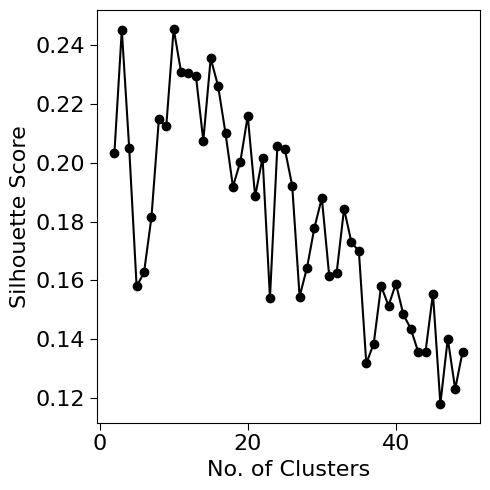

In [85]:
ax = plotting(range(2,50),s_score, xlabel='No. of Clusters', ylabel='Silhouette Score', color='black')

# PCA

In [88]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [89]:
variance_arr_pca = []
error_arr_pca = []
for i in range(1, len(df.columns)+1):
    pca = PCA(n_components=i)
    pca.fit(df.values)
    variance_arr_pca.append(np.sum(pca.explained_variance_ratio_))
    
    X_reduced = pca.transform(df.values)
    X_prespace = pca.inverse_transform(X_reduced)
    error_arr_pca.append(mean_squared_error(df.values, X_prespace))

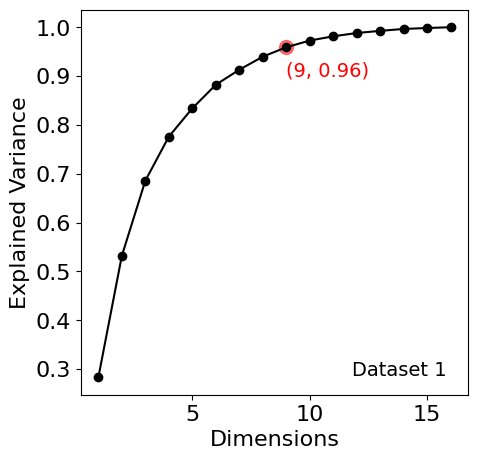

In [113]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1, len(df.columns)+1), variance_arr_pca, color='black', marker='o')
ax.set_xlabel('Dimensions')
ax.set_ylabel('Explained Variance')
ax.text(0.7, 0.05, 'Dataset 1', transform=ax.transAxes, fontsize=14)

plt.scatter(9, 0.9589735459001747, c='red', s=100, alpha=0.5)
ax.text(9, 0.90, '(9, 0.96)', fontsize=14, color='red')

plt.savefig("variance_arr_pca.png", dpi=300, bbox_inches='tight')

In [94]:
[*zip(range(1, len(df.columns)+1), variance_arr_pca)]

[(1, 0.2832793365973184),
 (2, 0.5321618800541492),
 (3, 0.6858149520511254),
 (4, 0.7759854163295754),
 (5, 0.8339306814426135),
 (6, 0.8822180297885759),
 (7, 0.9129639439329051),
 (8, 0.9396932335129462),
 (9, 0.9589735459001747),
 (10, 0.9727064872374586),
 (11, 0.9813830236400972),
 (12, 0.9881272011989968),
 (13, 0.9925745434009535),
 (14, 0.9965194127624136),
 (15, 0.9983618261511876),
 (16, 1.0)]

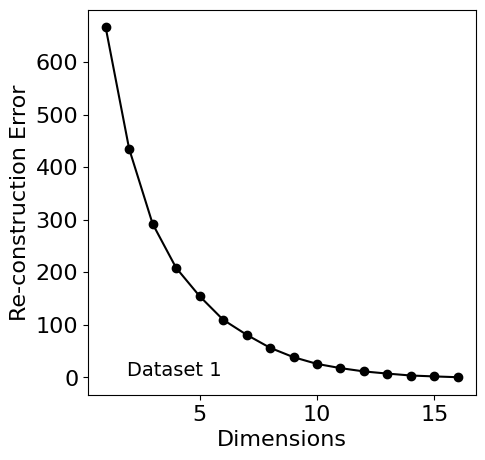

In [144]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1, len(df.columns)+1), error_arr_pca, color='black', marker='o')
ax.set_xlabel('Dimensions')
ax.set_ylabel('Re-construction Error')
ax.text(0.1, 0.05, 'Dataset 1', transform=ax.transAxes, fontsize=14)
plt.savefig("MSE_arr_pca.png", dpi=300, bbox_inches='tight')
plt.show()

In [114]:
[*zip(range(1, len(df.columns)+1), error_arr_pca)]

[(1, 666.2549988825292),
 (2, 434.89674847926324),
 (3, 292.0626814026646),
 (4, 208.24129094371364),
 (5, 154.37606211125413),
 (6, 109.48871776493752),
 (7, 80.90768188881222),
 (8, 56.06045240510427),
 (9, 38.13770346827055),
 (10, 25.371724639241744),
 (11, 17.306119660309875),
 (12, 11.036812465180429),
 (13, 6.902616082830255),
 (14, 3.23551247298967),
 (15, 1.5228269136658228),
 (16, 1.266047653636216e-27)]

# ICA

In [115]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

In [139]:
kur_arr = []
error_arr_ica = []
for i in range(1, len(df.columns)+1):
    ica = FastICA(n_components=i)
    ica.fit(df.values)
#     variance_arr.append(np.sum(pca.explained_variance_ratio_))
    
    X_reduced = ica.transform(df.values)
    kur_arr.append(np.mean(np.abs(kurtosis(X_reduced))))
    
    X_prespace = ica.inverse_transform(X_reduced)
    error_arr_ica.append(mean_squared_error(df.values, X_prespace))

C:\Users\Ruimin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\Ruimin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\Ruimin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\Ruimin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\Ruimin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='un

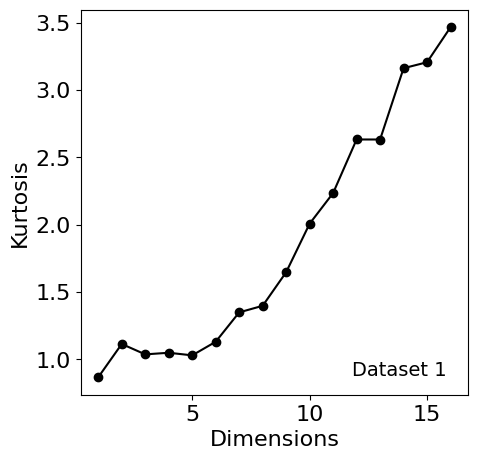

In [140]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1, len(df.columns)+1), kur_arr, color='black', marker='o')
ax.set_xlabel('Dimensions')
ax.set_ylabel('Kurtosis')
ax.text(0.7, 0.05, 'Dataset 1', transform=ax.transAxes, fontsize=14)

plt.savefig("kurtosis_ica.png", dpi=300, bbox_inches='tight')

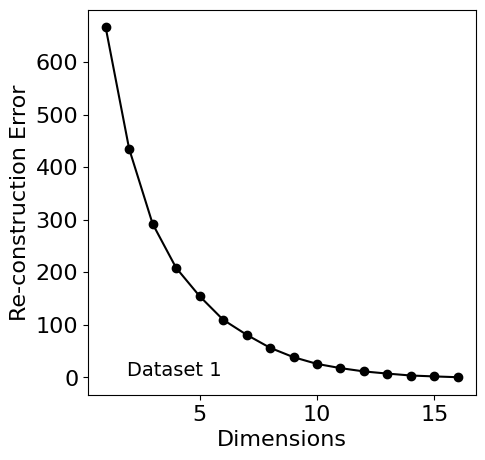

In [145]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1, len(df.columns)+1), error_arr_ica, color='black', marker='o')
ax.set_xlabel('Dimensions')
ax.set_ylabel('Re-construction Error')
ax.text(0.1, 0.05, 'Dataset 1', transform=ax.transAxes, fontsize=14)
plt.savefig("MSE_arr_ica.png", dpi=300, bbox_inches='tight')
plt.show()

In [146]:
[*zip(range(1, len(df.columns)+1), error_arr_ica)]

[(1, 666.2549988825292),
 (2, 434.89674847926256),
 (3, 292.06268140266485),
 (4, 208.24129094371324),
 (5, 154.37606211125404),
 (6, 109.48871776493758),
 (7, 80.90768188881222),
 (8, 56.060452405104265),
 (9, 38.137703468270544),
 (10, 25.371724639241748),
 (11, 17.306119660309875),
 (12, 11.036812465180425),
 (13, 6.9026160828302485),
 (14, 3.2355124729896696),
 (15, 1.5228269136658243),
 (16, 1.0297621568840448e-27)]

# Randomized Projections -- RP

In [147]:
from sklearn import random_projection
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection

In [163]:
error_arr_rp = []
for i in range(1, len(df.columns)+1):
    rand_proj = SparseRandomProjection(n_components=i, compute_inverse_components=True)
    rand_proj.fit(df.values)
#     variance_arr.append(np.sum(pca.explained_variance_ratio_))
    
    X_reduced = rand_proj.transform(df.values)   
    X_prespace = rand_proj.inverse_transform(X_reduced)
    error_arr_rp.append(mean_squared_error(df.values, X_prespace))

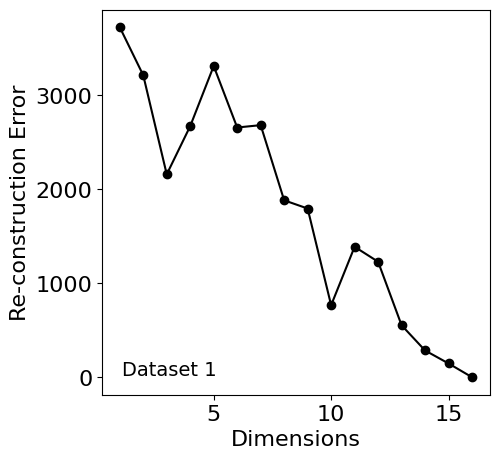

In [152]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1, len(df.columns)+1), error_arr_rp, color='black', marker='o')
ax.set_xlabel('Dimensions')
ax.set_ylabel('Re-construction Error')
ax.text(0.05, 0.05, 'Dataset 1', transform=ax.transAxes, fontsize=14)

plt.savefig("MSE_rp.png", dpi=300, bbox_inches='tight')


In [164]:
error_arr_rp_Gau = []
for i in range(1, len(df.columns)+1):
    rand_proj = GaussianRandomProjection(n_components=i, compute_inverse_components=True)
    rand_proj.fit(df.values)
#     variance_arr.append(np.sum(pca.explained_variance_ratio_))
    
    X_reduced = rand_proj.transform(df.values)   
    X_prespace = rand_proj.inverse_transform(X_reduced)
    error_arr_rp_Gau.append(mean_squared_error(df.values, X_prespace))

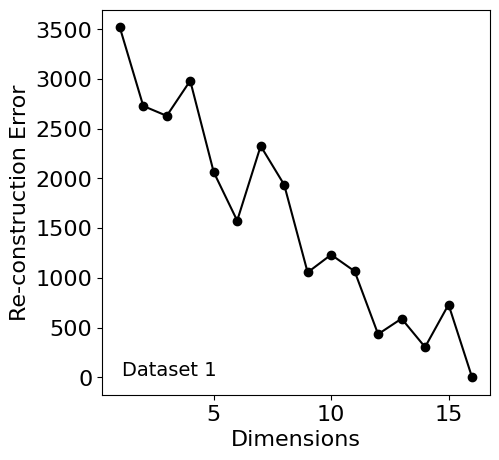

In [154]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1, len(df.columns)+1), error_arr_rp_Gau, color='black', marker='o')
ax.set_xlabel('Dimensions')
ax.set_ylabel('Re-construction Error')
ax.text(0.05, 0.05, 'Dataset 1', transform=ax.transAxes, fontsize=14)

plt.savefig("MSE_rp_Gau.png", dpi=300, bbox_inches='tight')

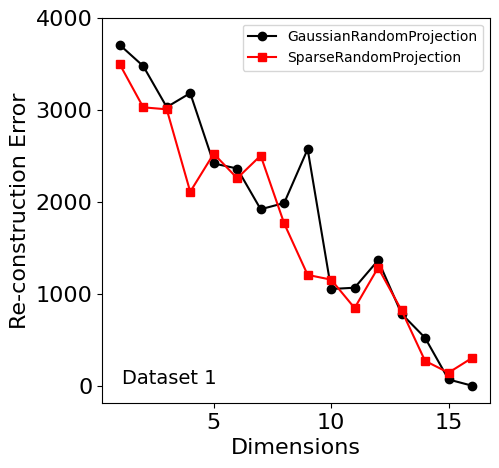

In [167]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1, len(df.columns)+1), error_arr_rp_Gau, color='black', marker='o', label='GaussianRandomProjection')
ax.plot(range(1, len(df.columns)+1), error_arr_rp, color='red', marker='s', label='SparseRandomProjection')
ax.set_xlabel('Dimensions')
ax.set_ylabel('Re-construction Error')
ax.text(0.05, 0.05, 'Dataset 1', transform=ax.transAxes, fontsize=14)

major_ticks = np.arange(0, 4001, 1000)

ax.set_yticks(major_ticks)

plt.legend()
plt.savefig("MSE_RP_both.png", dpi=300, bbox_inches='tight')

# Dictionary learning

In [169]:
from sklearn.decomposition import DictionaryLearning

In [172]:
len(df.columns)+1

17

In [179]:
df1 = df.sample(500)
df1.shape

(500, 16)

In [180]:
error_arr_dl=[]
spars_arr_dl=[]
for i in range(1, len(df1.columns)+1, 3):
    dict_learner = DictionaryLearning(n_components=i)
    X_DL = dict_learner.fit_transform(df1.values)
    X_hat = X_DL@dict_learner.components_
    loss = np.mean(np.sum((X_hat-df1.values)**2, axis=1)/np.sum(df1.values**2, axis=1))
    error_arr_dl.append(loss)
    spars_arr_dl.append(np.mean(X_DL==0))

<AxesSubplot: xlabel='Dimensions', ylabel='Level of Sparisity'>

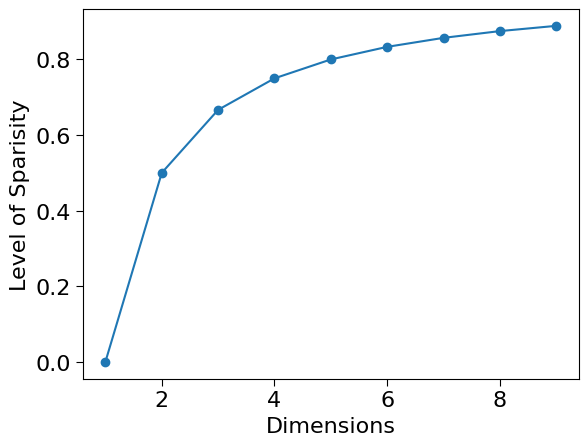

In [27]:
plotting(range(1, len(df.columns)+1), spars_arr, xlabel='Dimensions', ylabel='Level of Sparisity')

Text(0.05, 0.05, 'Dataset 2')

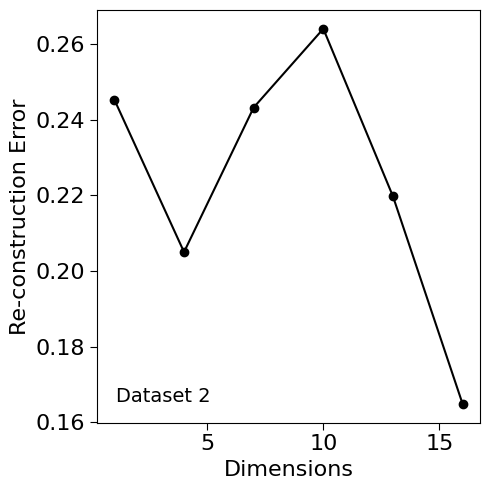

In [187]:
plotting(range(1, len(df1.columns)+1, 3), error_arr_dl, xlabel='Dimensions', ylabel='Re-construction Error', color='black')
ax = plt.gca()
ax.text(0.05, 0.05, 'Dataset 2', transform=ax.transAxes, fontsize=14)

# Clustering after dim reduction

In [186]:
#datasets after dim reduction

#pca
t1 = time.time()
pca = PCA(n_components=10, random_state=4)
df_pca = pd.DataFrame(pca.fit_transform(df.values))
T_pca = time.time()-t1

#ICA
t1 = time.time()
ica = FastICA(n_components=10, random_state=4)
df_ica = pd.DataFrame(ica.fit_transform(df.values))
T_ica = time.time()-t1

#RCA
t1 = time.time()
rca = SparseRandomProjection(n_components=10, random_state=4)
df_rca = pd.DataFrame(rca.fit_transform(df.values))
T_rca = time.time()-t1

C:\Users\Ruimin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [188]:
#dict learning
t1 = time.time()
dl = DictionaryLearning(n_components=10, random_state=4)
df_dl = pd.DataFrame(dl.fit_transform(df1.values))
T_dl = time.time()-t1

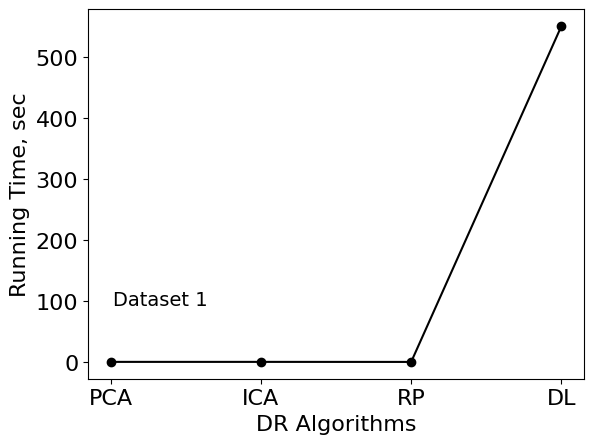

In [190]:
fig, ax = plt.subplots()

ax.plot([1,2,3,4], [T_pca, T_ica, T_rca, T_dl], color='black', marker='o')
ax.set_xticks([1,2,3,4], labels=['PCA', 'ICA', 'RP', 'DL'])
# ax.set_yticks(np.arange(-0, 175.1, 25))
ax.set_xlabel('DR Algorithms')
ax.set_ylabel('Running Time, sec')

ax.text(0.05, 0.2, 'Dataset 1', transform=ax.transAxes, fontsize=14)

# ax2 = fig.add_axes([0.28, 0.4, 0.4, 0.4])
# ax2.plot([1,2,3], [T_pca, T_ica, T_rca], marker='o', color='black')
# ax2.set_xticks([1,2,3], labels=['PCA', 'ICA', 'RP'])

plt.savefig('running time_all.png', dpi=300, bbox_inches='tight')

In [191]:
inertia_score_pca = []
s_score_pca = []
time_arr_pca = []

for k in range(2,50):
    t1 = time.time()
    kmeans = KMeans(n_clusters=k).fit(df_pca.values)
    time_arr_pca.append(time.time()-t1)
    inertia_score_pca.append(kmeans.inertia_)
    s_score_pca.append(silhouette_score(df_pca.values, kmeans.labels_)) 

In [192]:
inertia_score_ica = []
s_score_ica = []
time_arr_ica = []

for k in range(2,50):
    t1 = time.time()
    kmeans = KMeans(n_clusters=k).fit(df_ica.values)
    time_arr_ica.append(time.time()-t1)
    inertia_score_ica.append(kmeans.inertia_)
    s_score_ica.append(silhouette_score(df_ica.values, kmeans.labels_)) 

In [193]:
inertia_score_rca = []
s_score_rca = []
time_arr_rca = []

for k in range(2,50):
    t1 = time.time()
    kmeans = KMeans(n_clusters=k).fit(df_rca.values)
    time_arr_rca.append(time.time()-t1)
    inertia_score_rca.append(kmeans.inertia_)
    s_score_rca.append(silhouette_score(df_rca.values, kmeans.labels_)) 

In [194]:
inertia_score_dl = []
s_score_dl = []
time_arr_dl = []

for k in range(2,50):
    t1 = time.time()
    kmeans = KMeans(n_clusters=k).fit(df_dl.values)
    time_arr_dl.append(time.time()-t1)
    inertia_score_dl.append(kmeans.inertia_)
    s_score_dl.append(silhouette_score(df_dl.values, kmeans.labels_)) 

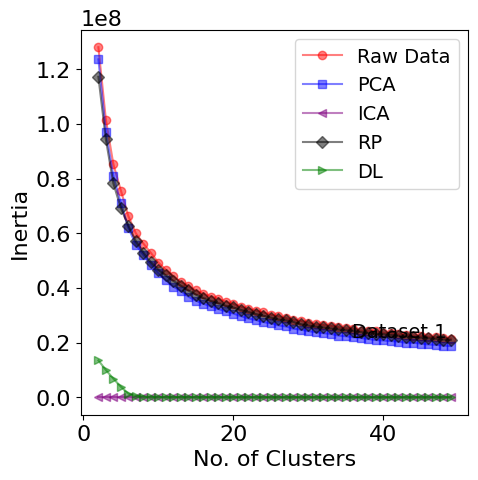

In [198]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(2,50),inertia_score, color='red', marker='o', alpha=0.5, label='Raw Data')
ax.plot(range(2,50),inertia_score_pca, color='blue', marker='s', alpha=0.5, label='PCA')
ax.plot(range(2,50),inertia_score_ica, color='purple', marker='<', alpha=0.5, label='ICA')
ax.plot(range(2,50),inertia_score_rca, color='black', marker='D', alpha=0.5, label='RP')
ax.plot(range(2,50),inertia_score_dl, color='green', marker='>', alpha=0.5, label='DL')

ax.set_xlabel('No. of Clusters')
ax.set_ylabel('Inertia')
ax.legend(fontsize=14)

ax.text(0.7, 0.2, 'Dataset 1', transform=ax.transAxes, fontsize=14)

plt.savefig('Inertia for all_KM.png', dpi=300, bbox_inches='tight')
plt.show()

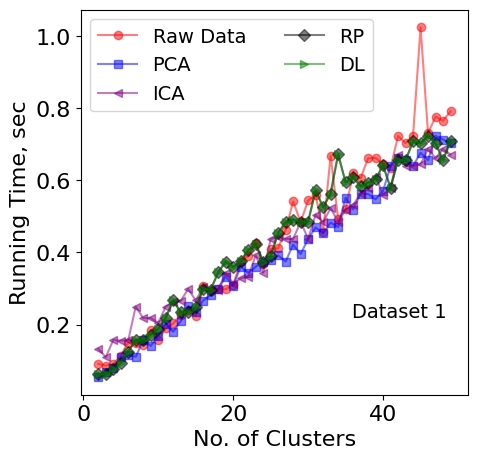

In [204]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(2,50), time_arr, color='red', marker='o', alpha=0.5, label='Raw Data')
ax.plot(range(2,50), time_arr_pca, color='blue', marker='s', alpha=0.5, label='PCA')
ax.plot(range(2,50), time_arr_ica, color='purple', marker='<', alpha=0.5, label='ICA')
ax.plot(range(2,50), time_arr_rca, color='black', marker='D', alpha=0.5, label='RP')
ax.plot(range(2,50), time_arr_dl, color='green', marker='>', alpha=0.5, label='DL')

ax.set_xlabel('No. of Clusters')
ax.set_ylabel('Running Time, sec')
ax.legend(fontsize=14, ncols=2)

ax.text(0.7, 0.2, 'Dataset 1', transform=ax.transAxes, fontsize=14)

plt.savefig('Running time for all_KM.png', dpi=300, bbox_inches='tight')
plt.show()

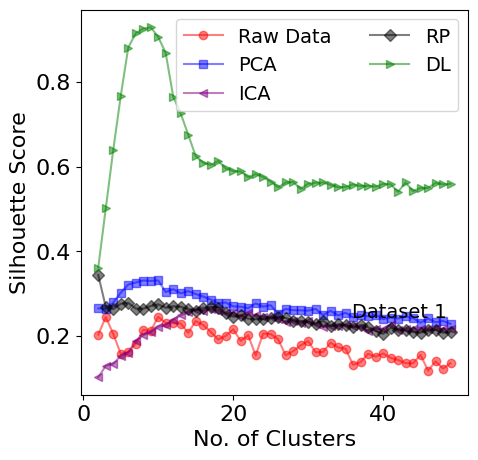

In [202]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(2,50), s_score, color='red', marker='o', alpha=0.5, label='Raw Data')
ax.plot(range(2,50), s_score_pca, color='blue', marker='s', alpha=0.5, label='PCA')
ax.plot(range(2,50), s_score_ica, color='purple', marker='<', alpha=0.5, label='ICA')
ax.plot(range(2,50), s_score_rca, color='black', marker='D', alpha=0.5, label='RP')
ax.plot(range(2,50), s_score_dl/, color='green', marker='>', alpha=0.5, label='DL')

ax.set_xlabel('No. of Clusters')
ax.set_ylabel('Silhouette Score')
ax.legend(fontsize=14, ncols=2)

ax.text(0.7, 0.2, 'Dataset 1', transform=ax.transAxes, fontsize=14)

plt.savefig('Sscore for all_KM.png', dpi=300, bbox_inches='tight')
plt.show()

In [206]:
#datasets after dim reduction

#pca
pca = PCA(n_components=10, random_state=4)
df_pca = pd.DataFrame(pca.fit_transform(df1.values))


#ICA
ica = FastICA(n_components=10, random_state=4)
df_ica = pd.DataFrame(ica.fit_transform(df1.values))

#RCA
rca = SparseRandomProjection(n_components=10, random_state=4)
df_rca = pd.DataFrame(rca.fit_transform(df1.values))

C:\Users\Ruimin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [207]:
s_score_pca_gm = []
time_arr_pca_gm = []

for k in range(2,50):
    t1 = time.time()
    gm = GaussianMixture(n_components=k, n_init=10).fit(df_pca.values)
    time_arr_pca_gm.append(time.time()-t1)
    s_score_pca_gm.append(silhouette_score(df_pca.values, gm.predict(df_pca.values))) 

In [208]:
s_score_ica_gm = []
time_arr_ica_gm = []

for k in range(2,50):
    t1 = time.time()
    gm = GaussianMixture(n_components=k, n_init=10).fit(df_ica.values)
    time_arr_ica_gm.append(time.time()-t1)
    s_score_ica_gm.append(silhouette_score(df_ica.values, gm.predict(df_ica.values))) 

In [209]:
s_score_rca_gm = []
time_arr_rca_gm = []

for k in range(2,50):
    t1 = time.time()
    gm = GaussianMixture(n_components=k, n_init=10).fit(df_rca.values)
    time_arr_rca_gm.append(time.time()-t1)
    s_score_rca_gm.append(silhouette_score(df_rca.values, gm.predict(df_rca.values))) 

In [210]:
s_score_dl_gm = []
time_arr_dl_gm = []

for k in range(2,50):
    t1 = time.time()
    gm = GaussianMixture(n_components=k, n_init=10).fit(df_dl.values)
    time_arr_dl_gm.append(time.time()-t1)
    s_score_dl_gm.append(silhouette_score(df_dl.values, gm.predict(df_dl.values))) 

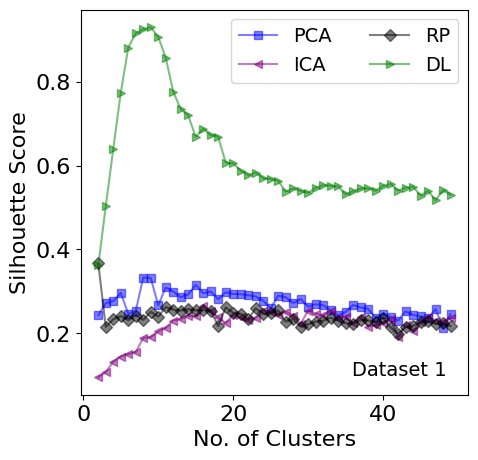

In [215]:
fig, ax = plt.subplots(figsize=(5,5))
# ax.plot(range(2,50), s_score_gm, color='red', marker='o', alpha=0.5, label='Raw Data')
ax.plot(range(2,50), s_score_pca_gm, color='blue', marker='s', alpha=0.5, label='PCA')
ax.plot(range(2,50), s_score_ica_gm, color='purple', marker='<', alpha=0.5, label='ICA')
ax.plot(range(2,50), s_score_rca_gm, color='black', marker='D', alpha=0.5, label='RP')
ax.plot(range(2,50), s_score_dl_gm, color='green', marker='>', alpha=0.5, label='DL')

ax.set_xlabel('No. of Clusters')
ax.set_ylabel('Silhouette Score')
ax.legend(fontsize=14, ncols=2)

ax.text(0.7, 0.05, 'Dataset 1', transform=ax.transAxes, fontsize=14)

plt.savefig('Sscore for all_gM.png', dpi=300, bbox_inches='tight')
plt.show()

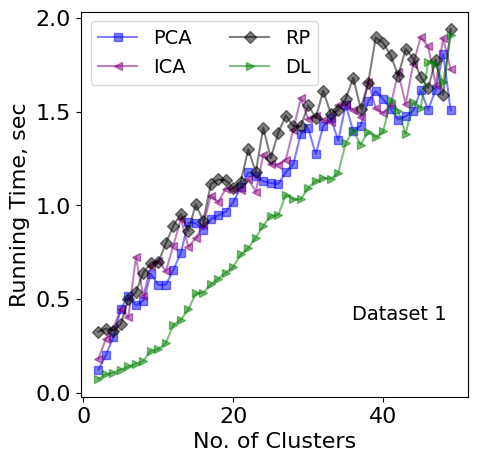

In [214]:
fig, ax = plt.subplots(figsize=(5,5))
# ax.plot(range(2,50), time_arr_gmm, color='red', marker='o', alpha=0.5, label='Raw Data')
ax.plot(range(2,50), time_arr_pca_gm, color='blue', marker='s', alpha=0.5, label='PCA')
ax.plot(range(2,50), time_arr_ica_gm, color='purple', marker='<', alpha=0.5, label='ICA')
ax.plot(range(2,50), time_arr_rca_gm, color='black', marker='D', alpha=0.5, label='RP')
ax.plot(range(2,50), time_arr_dl_gm, color='green', marker='>', alpha=0.5, label='DL')

ax.set_xlabel('No. of Clusters')
ax.set_ylabel('Running Time, sec')
ax.legend(fontsize=14, ncols=2)

ax.text(0.7, 0.2, 'Dataset 1', transform=ax.transAxes, fontsize=14)

plt.savefig('Running time for all_gM.png', dpi=300, bbox_inches='tight')
plt.show()